In [ ]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts.

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

read of data

In [ ]:
df = pd.read_csv('WineQT.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In this Dataset **quality** is our target column. Which has unique integer values in between 0 to 10.

In [ ]:
df.shape

(1143, 13)

In [ ]:
df.drop('Id', axis= 1, inplace= True)

**Data Exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


Here:-

*   All the feature columns have data-type **float64**
*   **Quality (target)** columns have data-type **integer**.



In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

All observation have **quality** ranking from from 3 to 8. Means No wine is extremely bad and no wine is excellent.

In [ ]:
df.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

Again, It is clear that very bad and excellent wines are very small in number 

**Data Visualization**

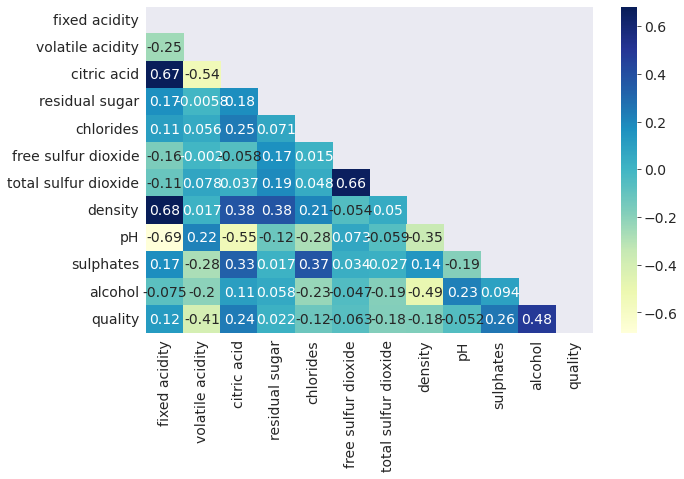

In [ ]:
mask = np.triu(np.ones_like(df.corr()))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.show()

It is clear that, correlation with target column to feature columns:-

*   **Postive correlation:** alcohol, sulphates residual sugar, citric acid, fixed acidity 
*   **Negative correlation:** volatile acidity, chlorides, total sulfur dioxide, density, pH



In [ ]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

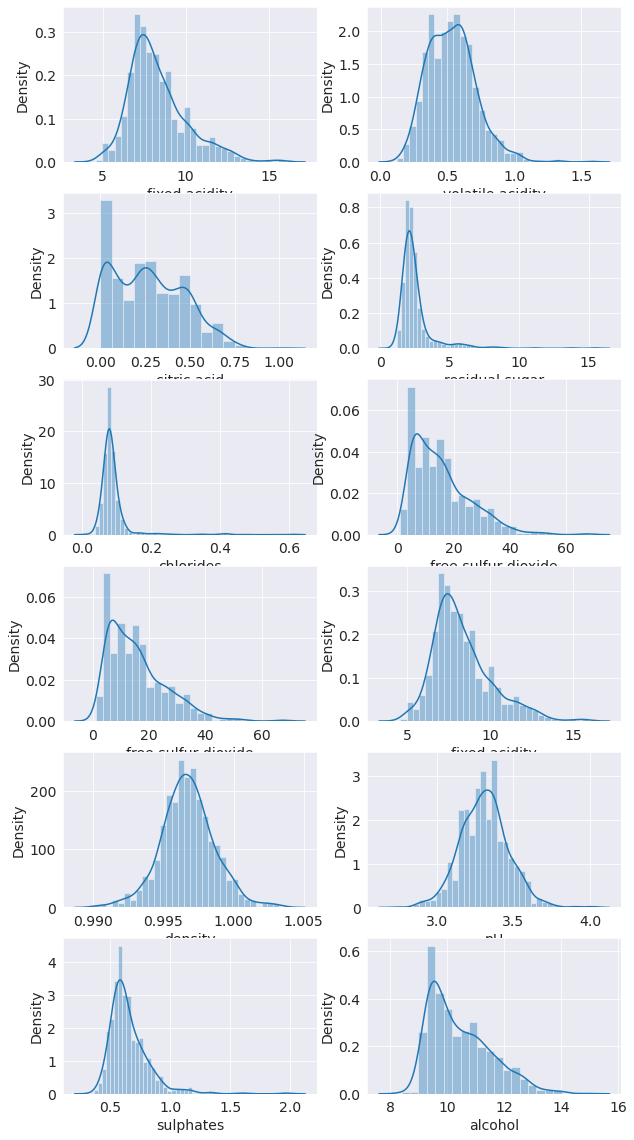

In [ ]:
fig, axes = plt.subplots(6,2, figsize=(10, 20))
sns.distplot(df['fixed acidity'],label='Fixed Acidity', ax=axes[0,0]);

sns.distplot(df['volatile acidity'],label='volatile acidity', ax=axes[0,1]);

sns.distplot(df['citric acid'],label='citric acid', ax=axes[1,0]);

sns.distplot(df['residual sugar'],label='residual sugar', ax=axes[1,1]);

sns.distplot(df['chlorides'],label='chlorides', ax=axes[2,0]);

sns.distplot(df['free sulfur dioxide'],label='free sulfur dioxide', ax=axes[2,1]);

sns.distplot(df['free sulfur dioxide'],label='free sulfur dioxide', ax=axes[3,0]);

sns.distplot(df['fixed acidity'],label='Fixed Acidity', ax=axes[3,1]);

sns.distplot(df['density'],label='density', ax=axes[4,0]);

sns.distplot(df['pH'],label='pH', ax=axes[4,1]);

sns.distplot(df['sulphates'],label='sulphates', ax=axes[5,0]);

sns.distplot(df['alcohol'],label='alcohol', ax=axes[5,1]);

import warnings
warnings.filterwarnings("ignore")

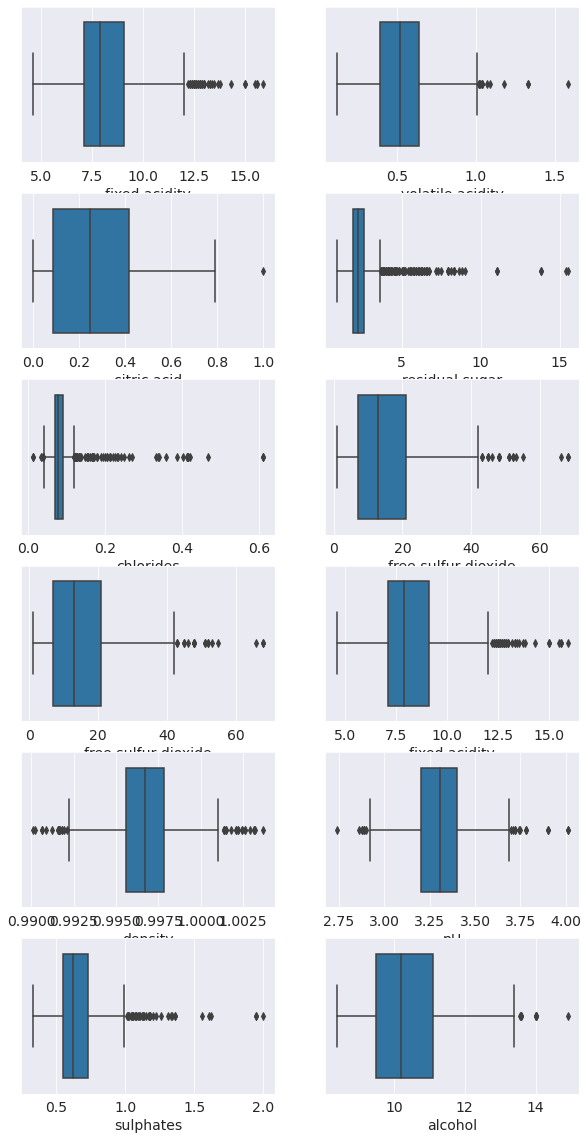

In [ ]:
fig, axes = plt.subplots(6,2, figsize=(10, 20))
sns.boxplot(df['fixed acidity'], ax=axes[0,0]);

sns.boxplot(df['volatile acidity'], ax=axes[0,1]);

sns.boxplot(df['citric acid'], ax=axes[1,0]);

sns.boxplot(df['residual sugar'], ax=axes[1,1]);

sns.boxplot(df['chlorides'], ax=axes[2,0]);

sns.boxplot(df['free sulfur dioxide'], ax=axes[2,1]);

sns.boxplot(df['free sulfur dioxide'], ax=axes[3,0]);

sns.boxplot(df['fixed acidity'], ax=axes[3,1]);

sns.boxplot(df['density'], ax=axes[4,0]);

sns.boxplot(df['pH'], ax=axes[4,1]);

sns.boxplot(df['sulphates'], ax=axes[5,0]);

sns.boxplot(df['alcohol'], ax=axes[5,1]);

import warnings
warnings.filterwarnings("ignore")

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis= 1)
y = df['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state= 42, stratify= y)

**Decision Tree**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred = dt.predict(X_train)
print('Confusion Matrix: \n',confusion_matrix(y_train, y_train_pred))
print('Accuracy Score: ', dt.score(X_train, y_train))

Confusion Matrix: 
 [[  5   0   0   0   0   0]
 [  0  26   0   0   0   0]
 [  0   0 386   0   0   0]
 [  0   0   0 370   0   0]
 [  0   0   0   0 114   0]
 [  0   0   0   0   0  13]]
Accuracy Score:  1.0


In [ ]:
y_test_pred = dt.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y_test, y_test_pred))
print('Accuracy Score: ', dt.score(X_test, y_test))

Confusion Matrix: 
 [[ 0  0  1  0  0  0]
 [ 0  1  4  2  0  0]
 [ 0  3 70 23  1  0]
 [ 1  3 22 51 13  2]
 [ 0  0  4  7 18  0]
 [ 0  0  0  2  1  0]]
Accuracy Score:  0.611353711790393


model is **highly overfitted**

To reduce overfittng, we try differnet value of max_depth

In [ ]:
max_depth_range = np.arange(1,20,1)
for x in max_depth_range:
  dt = DecisionTreeClassifier(max_depth= x)
  dt.fit(X_train, y_train)
  print('for max_depth: ', x)
  print('Accuracy Score train: ', dt.score(X_train, y_train))
  print('Accuracy Score test: ', dt.score(X_test, y_test))
  print()

for max_depth:  1
Accuracy Score train:  0.5459518599562363
Accuracy Score test:  0.5938864628820961

for max_depth:  2
Accuracy Score train:  0.562363238512035
Accuracy Score test:  0.5851528384279476

for max_depth:  3
Accuracy Score train:  0.5711159737417943
Accuracy Score test:  0.5895196506550219

for max_depth:  4
Accuracy Score train:  0.6334792122538293
Accuracy Score test:  0.5764192139737991

for max_depth:  5
Accuracy Score train:  0.6739606126914661
Accuracy Score test:  0.611353711790393

for max_depth:  6
Accuracy Score train:  0.7264770240700219
Accuracy Score test:  0.5764192139737991

for max_depth:  7
Accuracy Score train:  0.7888402625820569
Accuracy Score test:  0.5764192139737991

for max_depth:  8
Accuracy Score train:  0.8216630196936543
Accuracy Score test:  0.6157205240174672

for max_depth:  9
Accuracy Score train:  0.8698030634573304
Accuracy Score test:  0.611353711790393

for max_depth:  10
Accuracy Score train:  0.8982494529540481
Accuracy Score test:  0.

It means model is not overfitted at max_depth = 5 (best value)

In [ ]:
dt = DecisionTreeClassifier(max_depth= 5)
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
print('Confusion Matrix: \n',confusion_matrix(y_train, y_train_pred))
print('Accuracy Score train: ', dt.score(X_train, y_train))

Confusion Matrix: 
 [[  0   0   3   2   0   0]
 [  0   3  12  11   0   0]
 [  0   0 323  56   7   0]
 [  0   0 121 214  35   0]
 [  0   0   5  34  75   0]
 [  0   0   0   5   8   0]]
Accuracy Score train:  0.6728665207877462


In [ ]:
y_test_pred = dt.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y_test, y_test_pred))
print('Accuracy Score test: ', dt.score(X_test, y_test))

Confusion Matrix: 
 [[ 0  0  1  0  0  0]
 [ 0  0  6  1  0  0]
 [ 0  0 78 16  3  0]
 [ 0  0 32 48 12  0]
 [ 0  0  3 15 11  0]
 [ 0  0  0  2  1  0]]
Accuracy Score test:  0.5982532751091703


To make the model more accurate, we should use feature selection, as there are many negative correlated feature also avilable.

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
def run_df(X_train_rf, X_test_rf, y_train, y_test):
  clf = DecisionTreeClassifier(max_depth = 5)
  clf.fit(X_train, y_train)
  print('train data score:',clf.score(X_train, y_train))
  print('test data score:',clf.score(X_test, y_test))

In [ ]:
%%time
for index in range(1, 11, 1):
  sel = RFE(DecisionTreeClassifier(), n_features_to_select= index)
  sel.fit(X_train, y_train)
  X_train_df = sel.transform(X_train)
  X_test_df = sel.transform(X_test)
  print('selected feature: ', index)
  run_df(X_train_df, X_test_df, y_train, y_test)
  print()

selected feature:  1
train data score: 0.6728665207877462
test data score: 0.5982532751091703

selected feature:  2
train data score: 0.6739606126914661
test data score: 0.611353711790393

selected feature:  3
train data score: 0.6739606126914661
test data score: 0.611353711790393

selected feature:  4
train data score: 0.6739606126914661
test data score: 0.611353711790393

selected feature:  5
train data score: 0.6728665207877462
test data score: 0.5982532751091703

selected feature:  6
train data score: 0.6728665207877462
test data score: 0.5982532751091703

selected feature:  7
train data score: 0.6728665207877462
test data score: 0.5982532751091703

selected feature:  8
train data score: 0.6739606126914661
test data score: 0.6026200873362445

selected feature:  9
train data score: 0.6739606126914661
test data score: 0.6026200873362445

selected feature:  10
train data score: 0.6728665207877462
test data score: 0.5895196506550219

CPU times: user 856 ms, sys: 13.6 ms, total: 869 ms


Hence it is clear that by changing the feature accuracy doesn't change

In [ ]:
# %%time 
# from sklearn.ensemble import RandomForestClassifier #delete
# for index in range(1, 11, 1):
#   sel = RFE(RandomForestClassifier(), n_features_to_select= index)
#   sel.fit(X_train, y_train)
#   X_train_df = sel.transform(X_train)
#   X_test_df = sel.transform(X_test)
#   print('selected feature: ', index)
#   run_df(X_train_df, X_test_df, y_train, y_test)
#   print()

In [ ]:
# %%time
# from sklearn.ensemble import GradientBoostingClassifier #delete
# for index in range(1, 11, 1):
#   sel = RFE(GradientBoostingClassifier(), n_features_to_select= index)
#   sel.fit(X_train, y_train)
#   X_train_df = sel.transform(X_train)
#   X_test_df = sel.transform(X_test)
#   print('selected feature: ', index)
#   run_df(X_train_df, X_test_df, y_train, y_test)
#   print()

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_train_pred = rf.predict(X_train)
print('Confusion Matrix: \n',confusion_matrix(y_train, y_train_pred))
print('Accuracy Score: ', rf.score(X_train, y_train))

Confusion Matrix: 
 [[  5   0   0   0   0   0]
 [  0  26   0   0   0   0]
 [  0   0 386   0   0   0]
 [  0   0   0 370   0   0]
 [  0   0   0   0 114   0]
 [  0   0   0   0   0  13]]
Accuracy Score:  1.0


In [ ]:
y_test_pred = rf.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y_test, y_test_pred))
print('Accuracy Score: ', rf.score(X_test, y_test))

Confusion Matrix: 
 [[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 82 14  1  0]
 [ 0  0 22 66  4  0]
 [ 0  0  3 12 14  0]
 [ 0  0  0  3  0  0]]
Accuracy Score:  0.7074235807860262


Again, the model is **overfitted**. Hence we have to tune the parameter to fit the model.

In [ ]:
max_depth_range = np.arange(1,15,1)
for x in max_depth_range:
  dt = RandomForestClassifier(max_depth= x)
  dt.fit(X_train, y_train)
  print('for max_depth: ', x)
  print('Accuracy Score train: ', dt.score(X_train, y_train))
  print('Accuracy Score test: ', dt.score(X_test, y_test))
  print()

for max_depth:  1
Accuracy Score train:  0.5820568927789934
Accuracy Score test:  0.6375545851528385

for max_depth:  2
Accuracy Score train:  0.600656455142232
Accuracy Score test:  0.6375545851528385

for max_depth:  3
Accuracy Score train:  0.6181619256017505
Accuracy Score test:  0.6331877729257642

for max_depth:  4
Accuracy Score train:  0.6739606126914661
Accuracy Score test:  0.6593886462882096

for max_depth:  5
Accuracy Score train:  0.7297592997811816
Accuracy Score test:  0.6681222707423581

for max_depth:  6
Accuracy Score train:  0.7811816192560175
Accuracy Score test:  0.6768558951965066

for max_depth:  7
Accuracy Score train:  0.8347921225382933
Accuracy Score test:  0.6812227074235808

for max_depth:  8
Accuracy Score train:  0.8982494529540481
Accuracy Score test:  0.6855895196506551

for max_depth:  9
Accuracy Score train:  0.9420131291028446
Accuracy Score test:  0.7030567685589519

for max_depth:  10
Accuracy Score train:  0.9792122538293216
Accuracy Score test:  

At max_depth = 6, we got Bias- Variance Tradeoff

In [ ]:
rf = RandomForestClassifier(max_depth= 6)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
print('Confusion Matrix: \n',confusion_matrix(y_train, y_train_pred))
print('Accuracy Score train: ', rf.score(X_train, y_train))

y_test_pred = rf.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y_test, y_test_pred))
print('Accuracy Score test: ', rf.score(X_test, y_test))

Confusion Matrix: 
 [[  0   0   5   0   0   0]
 [  0   1  16   9   0   0]
 [  0   0 327  57   2   0]
 [  0   0  62 306   2   0]
 [  0   0   0  45  69   0]
 [  0   0   0   9   3   1]]
Accuracy Score train:  0.7702407002188184
Confusion Matrix: 
 [[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 77 19  1  0]
 [ 0  0 22 67  3  0]
 [ 0  0  3 17  9  0]
 [ 0  0  0  3  0  0]]
Accuracy Score test:  0.6681222707423581


In [ ]:
def run_rf(X_train, X_test, y_train, y_test):
  clf = RandomForestClassifier(max_depth = 6)
  clf.fit(X_train, y_train)
  print('train data score:',clf.score(X_train, y_train))
  print('test data score:',clf.score(X_test, y_test))

In [ ]:
%%time
for index in range(1, 12, 1):
  sel = RFE(RandomForestClassifier(), n_features_to_select= index)
  sel.fit(X_train, y_train)
  X_train_rf = sel.transform(X_train)
  X_test_rf = sel.transform(X_test)
  print('selected feature: ', index)
  run_rf(X_train_rf, X_test_rf, y_train, y_test)
  print()

selected feature:  1
train data score: 0.5448577680525164
test data score: 0.4978165938864629

selected feature:  2
train data score: 0.6214442013129103
test data score: 0.4978165938864629

selected feature:  3
train data score: 0.6947483588621444
test data score: 0.6157205240174672

selected feature:  4
train data score: 0.7428884026258206
test data score: 0.6637554585152838

selected feature:  5
train data score: 0.7549234135667396
test data score: 0.6462882096069869

selected feature:  6
train data score: 0.7538293216630197
test data score: 0.6681222707423581

selected feature:  7
train data score: 0.7603938730853391
test data score: 0.6593886462882096

selected feature:  8
train data score: 0.7571115973741794
test data score: 0.6681222707423581

selected feature:  9
train data score: 0.7757111597374179
test data score: 0.6506550218340611

selected feature:  10
train data score: 0.7768052516411379
test data score: 0.6812227074235808

selected feature:  11
train data score: 0.7746170

It means here, also there is no need to feature selection. As the accuracy is highest when we use all features

**SVM**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
y_train_pred = svc.predict(X_train)
print('Confusion Matrix: \n',confusion_matrix(y_train, y_train_pred))
print('Accuracy Score: ', svc.score(X_train, y_train))

Confusion Matrix: 
 [[  0   0   1   4   0   0]
 [  0   0   6  20   0   0]
 [  0   0 155 231   0   0]
 [  0   0  69 301   0   0]
 [  0   0  12 100   2   0]
 [  0   0   1  12   0   0]]
Accuracy Score:  0.5010940919037199


In [ ]:
y_test_pred = svc.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y_test, y_test_pred))
print('Accuracy Score: ', svc.score(X_test, y_test))

Confusion Matrix: 
 [[ 0  0  0  1  0  0]
 [ 0  0  2  5  0  0]
 [ 0  0 42 55  0  0]
 [ 0  0 10 82  0  0]
 [ 0  0  2 27  0  0]
 [ 0  0  0  3  0  0]]
Accuracy Score:  0.5414847161572053


Model is **Underfitted**

In [ ]:
def with_kernel(kernel):
  for x in ['rbf', 'linear', 'poly']:
    svc = SVC(kernel = x)
    svc.fit(X_train, y_train)
    print('for kernel', x)
    print('Accuracy Score: ', svc.score(X_train, y_train))
    print('Accuracy Score: ', svc.score(X_test, y_test))
    print()

In [ ]:
Kernel_list = ['rbf', 'linear', 'poly']

In [ ]:
with_kernel(Kernel_list)

for kernel rbf
Accuracy Score:  0.5010940919037199
Accuracy Score:  0.5414847161572053

for kernel linear
Accuracy Score:  0.5831509846827133
Accuracy Score:  0.62882096069869

for kernel poly
Accuracy Score:  0.47702407002188185
Accuracy Score:  0.519650655021834



It is clear that linear kernel gives best accuracy among all the kernel.

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_train_pred = gb.predict(X_train)
print('Confusion Matrix: \n',confusion_matrix(y_train, y_train_pred))
print('Accuracy Score: ', gb.score(X_train, y_train))

Confusion Matrix: 
 [[  5   0   0   0   0   0]
 [  0  24   1   1   0   0]
 [  0   0 362  23   1   0]
 [  0   0  23 347   0   0]
 [  0   0   0  10 104   0]
 [  0   0   0   0   0  13]]
Accuracy Score:  0.9354485776805251


In [ ]:
y_test_pred = gb.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y_test, y_test_pred))
print('Accuracy Score: ', gb.score(X_test, y_test))

Confusion Matrix: 
 [[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  2 78 16  1  0]
 [ 0  0 24 59  9  0]
 [ 0  0  4 11 13  1]
 [ 0  0  0  3  0  0]]
Accuracy Score:  0.6550218340611353


Also this model is **overfitted**

In [ ]:
max_depth_range = np.arange(1,15,1)
for x in max_depth_range:
  dt = GradientBoostingClassifier(max_depth= x)
  dt.fit(X_train, y_train)
  print('for max_deoth: ', x)
  print('Accuracy Score train: ', dt.score(X_train, y_train))
  print('Accuracy Score test: ', dt.score(X_test, y_test))
  print()

for max_deoth:  1
Accuracy Score train:  0.6783369803063457
Accuracy Score test:  0.6419213973799127

for max_deoth:  2
Accuracy Score train:  0.8085339168490153
Accuracy Score test:  0.6812227074235808

for max_deoth:  3
Accuracy Score train:  0.936542669584245
Accuracy Score test:  0.6812227074235808

for max_deoth:  4
Accuracy Score train:  0.9978118161925602
Accuracy Score test:  0.6855895196506551

for max_deoth:  5
Accuracy Score train:  1.0
Accuracy Score test:  0.6681222707423581

for max_deoth:  6
Accuracy Score train:  1.0
Accuracy Score test:  0.6724890829694323

for max_deoth:  7
Accuracy Score train:  1.0
Accuracy Score test:  0.6462882096069869

for max_deoth:  8
Accuracy Score train:  1.0
Accuracy Score test:  0.6681222707423581

for max_deoth:  9
Accuracy Score train:  1.0
Accuracy Score test:  0.6899563318777293

for max_deoth:  10
Accuracy Score train:  1.0
Accuracy Score test:  0.6375545851528385

for max_deoth:  11
Accuracy Score train:  1.0
Accuracy Score test:  0.

In [ ]:
max_depth_range = np.arange(2, 15, 1)
for x in max_depth_range:
  dt = GradientBoostingClassifier(max_depth= 1, learning_rate=0.1)
  dt.fit(X_train, y_train)
  print('for min_samples_split: ', x)
  print('Accuracy Score train: ', dt.score(X_train, y_train))
  print('Accuracy Score test: ', dt.score(X_test, y_test))
  print()

for min_samples_split:  2
Accuracy Score train:  0.6783369803063457
Accuracy Score test:  0.6419213973799127

for min_samples_split:  3
Accuracy Score train:  0.6783369803063457
Accuracy Score test:  0.6419213973799127

for min_samples_split:  4
Accuracy Score train:  0.6783369803063457
Accuracy Score test:  0.6419213973799127

for min_samples_split:  5
Accuracy Score train:  0.6783369803063457
Accuracy Score test:  0.6419213973799127

for min_samples_split:  6
Accuracy Score train:  0.6783369803063457
Accuracy Score test:  0.6419213973799127

for min_samples_split:  7
Accuracy Score train:  0.6783369803063457
Accuracy Score test:  0.6419213973799127

for min_samples_split:  8
Accuracy Score train:  0.6783369803063457
Accuracy Score test:  0.6419213973799127

for min_samples_split:  9
Accuracy Score train:  0.6783369803063457
Accuracy Score test:  0.6419213973799127

for min_samples_split:  10
Accuracy Score train:  0.6783369803063457
Accuracy Score test:  0.6419213973799127

for min_s

**XG Boost**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_train_pred = xgb.predict(X_train)
print('Confusion Matrix: \n',confusion_matrix(y_train, y_train_pred))
print('Accuracy Score: ', xgb.score(X_train, y_train))

Confusion Matrix: 
 [[  5   0   0   0   0   0]
 [  0  14   7   5   0   0]
 [  0   0 336  49   1   0]
 [  0   0  49 316   5   0]
 [  0   0   0  23  91   0]
 [  0   0   0   3   0  10]]
Accuracy Score:  0.8446389496717724


In [ ]:
y_test_pred = xgb.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y_test, y_test_pred))
print('Accuracy Score: ', xgb.score(X_test, y_test))

Confusion Matrix: 
 [[ 0  1  0  0  0  0]
 [ 0  0  4  2  1  0]
 [ 1  0 79 17  0  0]
 [ 0  0 25 59  7  1]
 [ 0  0  3 12 13  1]
 [ 0  0  0  3  0  0]]
Accuracy Score:  0.6593886462882096


In [ ]:
max_depth_range = np.arange(1,15,1)
for x in max_depth_range:
  dt = XGBClassifier(max_depth= x)
  dt.fit(X_train, y_train)
  print('for max_deoth: ', x)
  print('Accuracy Score train: ', dt.score(X_train, y_train))
  print('Accuracy Score test: ', dt.score(X_test, y_test))
  print()

for max_deoth:  1
Accuracy Score train:  0.6269146608315098
Accuracy Score test:  0.6331877729257642

for max_deoth:  2
Accuracy Score train:  0.737417943107221
Accuracy Score test:  0.6768558951965066

for max_deoth:  3
Accuracy Score train:  0.8446389496717724
Accuracy Score test:  0.6593886462882096

for max_deoth:  4
Accuracy Score train:  0.9431072210065645
Accuracy Score test:  0.6812227074235808

for max_deoth:  5
Accuracy Score train:  0.9857768052516411
Accuracy Score test:  0.6724890829694323

for max_deoth:  6
Accuracy Score train:  0.9967177242888403
Accuracy Score test:  0.6681222707423581

for max_deoth:  7
Accuracy Score train:  1.0
Accuracy Score test:  0.6812227074235808

for max_deoth:  8
Accuracy Score train:  1.0
Accuracy Score test:  0.6812227074235808

for max_deoth:  9
Accuracy Score train:  1.0
Accuracy Score test:  0.6637554585152838

for max_deoth:  10
Accuracy Score train:  1.0
Accuracy Score test:  0.6593886462882096

for max_deoth:  11
Accuracy Score train:

At that point of time, all the model give low accuracy, after Bias-Variance tradeoff. We have two things to do.

1.   **Apply SMOTE to increase the training dataset**
2.   **Principal Component Analysis**

In [ ]:
from imblearn.over_sampling import SMOTE 

In [ ]:
unique, count = np.unique(y_train, return_counts= True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
y_train_dict_value_count

{3: 5, 4: 26, 5: 386, 6: 370, 7: 114, 8: 13}

In [ ]:
sm = SMOTE("minority")

In [ ]:
X_train_res1, y_train_res1 = sm.fit_resample(X_train,y_train)
X_train_res2, y_train_res2 = sm.fit_resample(X_train_res1,y_train_res1)
X_train_res3, y_train_res3 = sm.fit_resample(X_train_res2,y_train_res2)
X_train_res4, y_train_res4 = sm.fit_resample(X_train_res3,y_train_res3)

ValueError: ignored

In [ ]:
unique, count = np.unique(y_train_res4, return_counts= True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count